<a href="https://colab.research.google.com/github/XPikadragonX/desihigh/blob/main/Two_Body_Orbit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import os
import sys
sys.path.append('/content/drive/MyDrive/desihigh/')

In [26]:
import time
import astropy
import itertools
import matplotlib

import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.units     as u

from   astropy.cosmology import FlatLambdaCDM
from   IPython.display   import YouTubeVideo
from   tools.flops       import flops

In [27]:
from IPython.display import clear_output
from time import sleep

In [28]:
%matplotlib inline

plt.style.use('dark_background')

In [29]:
#V_init1 = input("input intial velocity of body 1 (m/s):")
#V_init2 = input("input intial velocity of body 2 (m/s):")
#m_1 = input("input mass of body 1 (kg):")
#m_2 = input("input mass of body 2 (kg):")
#r_meter = input("input intial distance between the bodies (m):")
#dt = input("input rate of change in time (years):")
#t_max = input("input how long the simulation runs (in years):")

In [30]:
G_constant = 6.67e-11 #N m^2 kg^-2
au= 1.496e+11 #meters
V_init1 = 11000 #m/s
V_init2 = -5500 #m/s
m_1 = 1.5e30 #kg
m_2 = 6e30 #kg
r_meter = 1.5e12 #m
dt = 0.1 #yr
t_max = 1000
yr = 31536000
delta_t = dt*yr
r_init = r_meter/au

r_1 = r_init/(1+(m_1/m_2)) #radius from body1 to center of mass
print("r_1:",r_1)

r_2 = -((m_1/m_2)*r_1) #radius from body2 to center of mass
print("r_2:",r_2)

V_sys = (m_1*V_init1 + m_2*V_init2)/(m_1 + m_2) #velocity of the system
print("V_sys:",V_sys)

V_1 = V_init1 - V_sys
V_2 = V_init2 - V_sys

Energy = ((m_1*(V_1**2) + m_2*(V_2**2))/2) - (G_constant*m_1*m_2)/r_init #energy of the system
print("Energy:",Energy)

L_init = (m_1*V_1*r_1) + (m_2*V_2*r_2) #initial angular momentum
print("L:",L_init)

Myu = (m_1*m_2)/(m_1 + m_2) #reduced mass of the system
print("Myu:",Myu)

M_sys = m_1 + m_2 #total mass of the system
print("M_sys:",M_sys)

eccentricity = (1 + (2*(L_init**2)*Energy)/((Myu**3)*(G_constant**2)*(M_sys**2)))**(1/2) #eccentricity of the orbit
print("eccentricity:", eccentricity)

SM_axis = -(G_constant*M_sys*Myu)/(2*Energy) #Semi Major Axis of the orbit
print("SM_axis:",SM_axis)

theta_0 = np.arccos(round((((SM_axis*(1-eccentricity**2))/(r_init*eccentricity))-(1/eccentricity)),5))
print("theta_0:",theta_0)

theta = theta_0

n=0
t=0
while t <t_max:
  Rho = (SM_axis*(1-eccentricity**2))/(1+eccentricity*(np.cos(theta)))
  theta = theta + (L_init/(Myu*Rho**2))*delta_t
  n=n+1
  t=t+dt

  Rho_x = Rho*np.cos(theta)
  Rho_y = Rho*np.cos(theta)
  R_1varx = (-Myu/m_1)*Rho_x-1
  R_1vary = (-Myu/m_1)*Rho_y-1
  R_2varx = (Myu/m_2)*Rho_x-1
  R_2vary = (Myu/m_2)*Rho_y-1


print(theta)
print(n)
print("t:",t)

r_1: 8.02139037433155
r_2: -2.0053475935828877
V_sys: -2200.0
Energy: -5.986991999983664e+49
L: 1.9852941176470586e+35
Myu: 1.1999999999999998e+30
M_sys: 7.5e+30
eccentricity: 0.9999999999945431
SM_axis: 5.0133689839708975
theta_0: 3.141592653589793
9.638782482382323e+35
10000
t: 1000.0000000001588


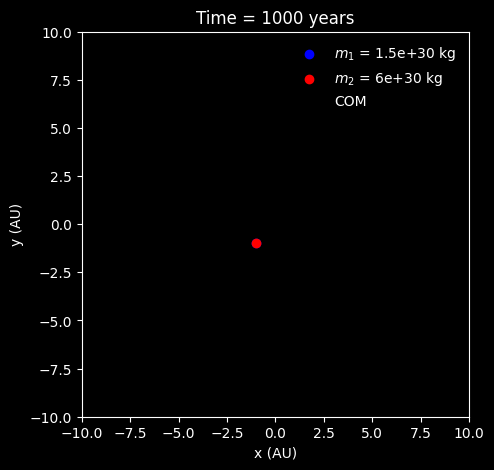

In [31]:
from matplotlib import animation, rc
nsteps= 50
rc('animation', html='jshtml') # this will make the animation run in colab

%matplotlib inline

# Her we set some arrays that contain the positions of m1 and m2 in cartesian coordinates
pos1 = np.array([R_1varx,R_1vary])
pos2 = np.array([R_2varx,R_2vary])

def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point,title, and axes
    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot(pos1[ :num+1], pos1[ :num+1], c='blue')

    # Updating Point Location
    ax.scatter(pos1[ num % 2], pos1[ num % 2],
               c='blue', marker='o', label=f'$m_1$ = {m_1} kg')

    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot(pos2[:num+1], pos2[ :num+1], c='red')
    # Updating Point Location
    ax.scatter(pos2[ num%2], pos2[ num%2],
               c='red', marker='o', label=f'$m_2$ = {m_2} kg')   # title, and axes

    # set COM pos should be at origin
    ax.scatter(0,0,color='k', label='COM')

    # Setting Axes Limits
    #ax.set_xlim(x.min()*2, -x.min()*2)
    #ax.set_ylim(x.min()*2, -x.min()*2)
    ax.set_xlim(-10,10)
    ax.set_ylim(-10, 10)

    # Adding Figure Labels
    ax.set_title(f'Time = {t_max} years')
    ax.legend(loc='upper right', frameon=False)
    ax.set_xlabel('x (AU)')
    ax.set_ylabel('y (AU)')

# Plotting the Animation
fig = plt.figure(figsize=(5,5));
ax = plt.axes();
line_ani = animation.FuncAnimation(fig, animate_func, interval=50,frames=nsteps);

line_ani